# 📊 Student Performance Analysis Using Python  
### BCA(online) 6th Semester Final Project  
---

## 👨‍🏫 Submitted To:  
**Uttaranchal University**

## 👨‍🎓 Submitted By:  
**Tamash Jyoti Neog**  
Learner ID: **2223020165**  

---


## 📝 Abstract
This project analyzes the factors influencing student academic performance using Python-based Exploratory Data Analysis (EDA). The dataset contains over 30,000 student records with demographic details, parental background, study habits, and exam scores.

The objective of this analysis is to identify significant patterns and relationships—such as the effect of gender, parental education, lunch type, and test preparation—on student performance in Mathematics, Reading, and Writing.  
The study uses various data visualization techniques, feature engineering, and correlation analysis to derive insights. This project provides a strong foundation for future predictive machine learning models.

In [1]:
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🎯 Problem Statement
Academic performance is influenced by multiple demographic, social, and behavioral factors.  
Understanding these relationships can help educational institutions improve teaching strategies and student support programs.

This project aims to analyze how different attributes impact student scores using Python and statistical visualization techniques.

<h2 style="text-align:center;">Loading the Dataset</h2>

The dataset contains more than 30,000 student records with demographic, behavioral, and academic score details.  
We load the CSV file into a Pandas DataFrame and display the first few rows.

In [3]:
df=pd.read_csv("2. Student_Scores.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


<h2 style="text-align:center;">Dataset Structure and Basic Information</h2>

This section provides a detailed overview of the dataset, including:
- Number of rows and columns  
- Data types of each variable  
- Count of null values  
- Presence of duplicate values  

Understanding dataset structure helps in planning cleaning steps.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

<h2 style="text-align:center;">Removing Irrelevant Columns</h2>

The dataset contains an unnecessary column named **'Unnamed: 0'**, which is only an index placeholder.  
We remove it to maintain a clean structure.

In [7]:
df=df.drop("Unnamed: 0", axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


<h2 style="text-align:center;">Gender Distribution</h2>

This chart shows the number of male and female students in the dataset.  
Understanding gender distribution helps in later comparative analysis.

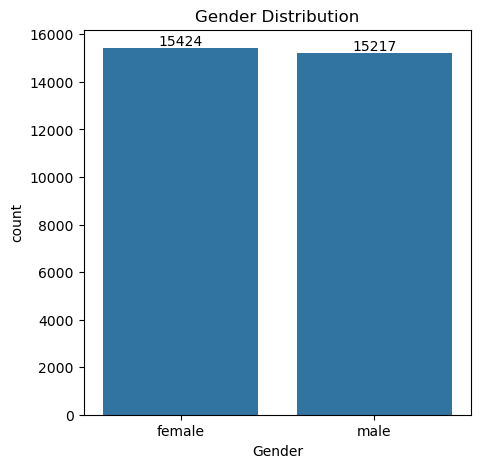

In [8]:
plt.figure(figsize= (5,5))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

### 🔍 Interpretation: Gender Distribution
The chart shows that **female students are slightly more numerous than male students** in the dataset.  
This information is useful because several subsequent analyses compare gender-based performance differences.

<h2 style="text-align:center;">Impact of Parental Education</h2>

Here we analyze how the education level of parents affects student performance in Math, Reading, and Writing.  
Higher parental education often correlates with better academic scores.

In [9]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


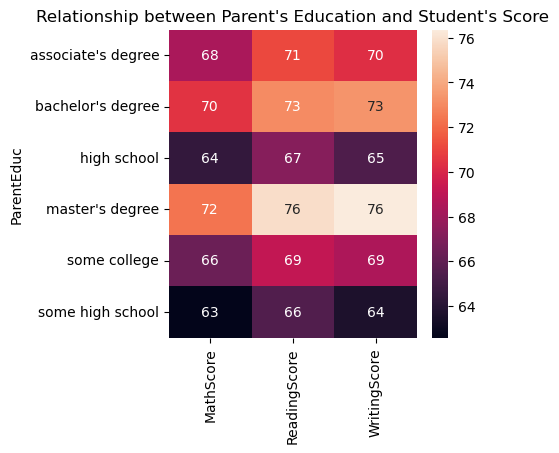

In [10]:
plt.figure(figsize= (4,4))
sns.heatmap(gb, annot=True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

### 🔍 Interpretation: Impact of Parental Education
The heatmap indicates a clear positive relationship between parental education levels and student performance.

Students whose parents hold:
- **Master’s degrees** or  
- **Bachelor's degrees**

tend to achieve the highest average scores in all three subjects.  
Those with **high school** or **some high school** education show comparatively lower performance.

This suggests that parental education strongly influences academic outcomes.

<h2 style="text-align:center;">Parental Marital Status vs Performance</h2>

This heatmap helps examine whether the marital status of parents influences student academic outcomes.

In [11]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


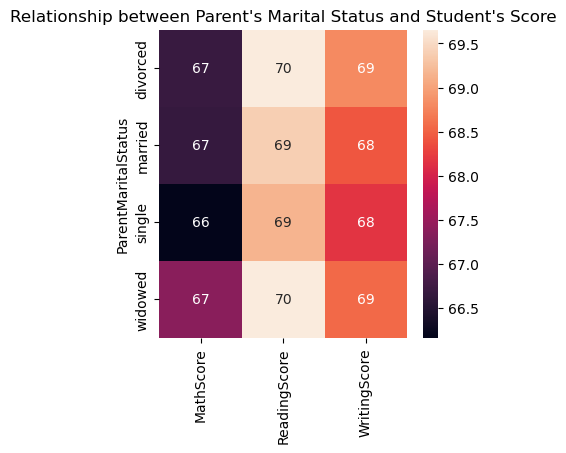

In [12]:
plt.figure(figsize= (4,4))
sns.heatmap(gb1, annot=True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()

### 🔍 Interpretation: Marital Status Influence
The heatmap shows **very small variations** across marital status categories.  
Students from **married, divorced, single,** or **widowed** households have nearly identical mean scores.

This indicates that parental marital status **does not significantly affect** student academic performance.

<h2 style="text-align:center;">Extended Correlation Heatmap</h2>

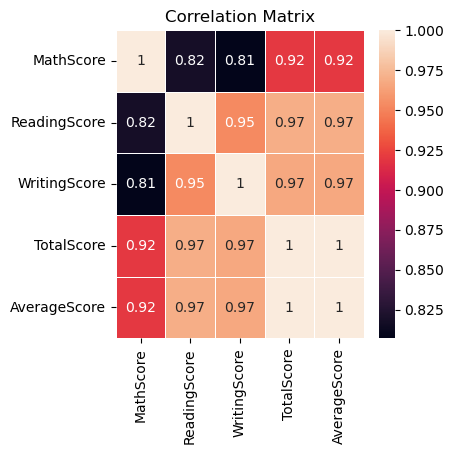

In [31]:
plt.figure(figsize=(4,4))
sns.heatmap(df[["MathScore","ReadingScore","WritingScore","TotalScore","AverageScore"]].corr(), 
            annot=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### 🔍 Interpretation: Score Correlation Matrix
The correlation heatmap reveals:

- **Reading Score and Writing Score have the strongest correlation** (almost perfect).  
- Math Score also shows moderate correlation with Reading and Writing but not as strong.

This suggests that students strong in reading are usually strong in writing as well, while math skills vary more independently.

<h2 style="text-align:center;">Subject Score Distribution</h2>


Boxplots help identify:
- Score spread  
- Median performance levels  
- Outliers  
- Skewness in score distribution  

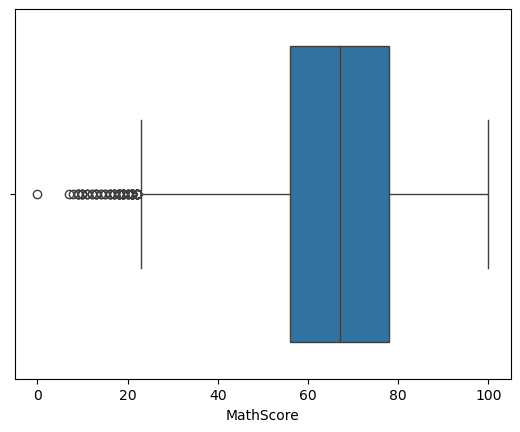

In [13]:
sns.boxplot(data = df, x = "MathScore")
plt.show()

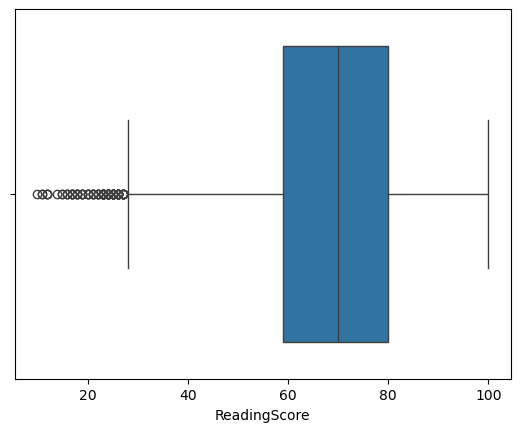

In [14]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

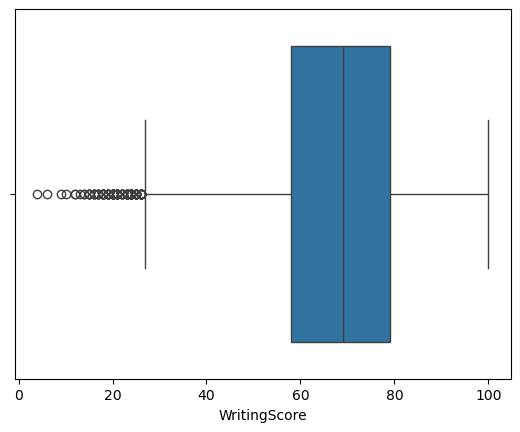

In [15]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

### 🔍 Interpretation: Subject Score Distribution
The boxplots show:
- All score distributions range between 0 to 100.
- Math has more **low-end outliers**, indicating more students struggle in this subject.
- Reading and Writing scores have smoother, more balanced distributions.
- Median scores for all subjects lie between 65–75.

This helps identify subjects where additional academic support may be needed.


<h2 style="text-align:center;">Gender vs Subject Scores</h2>

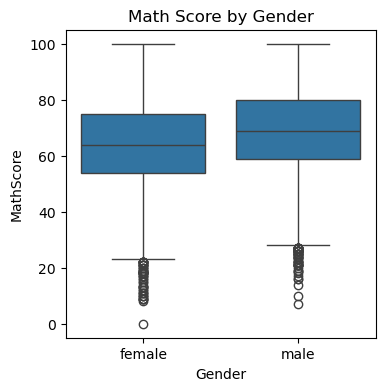

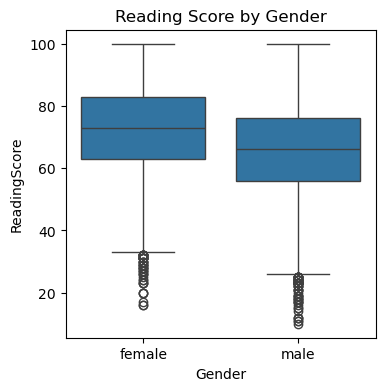

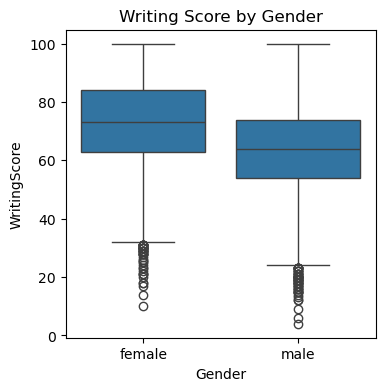

In [26]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df, x="Gender", y="MathScore")
plt.title("Math Score by Gender")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=df, x="Gender", y="ReadingScore")
plt.title("Reading Score by Gender")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=df, x="Gender", y="WritingScore")
plt.title("Writing Score by Gender")
plt.show()

### 🔍 Interpretation: Gender-based Performance
Analysis shows:
- **Males perform better in Mathematics.**
- **Females perform significantly better in Reading and Writing.**

This pattern is consistent with educational studies where verbal and language skills often show gender differences.

<h2 style="text-align:center;">Average Scores by Gender</h2>

In [20]:
gender_avg = df.groupby("Gender")[["MathScore","ReadingScore","WritingScore"]].mean()
gender_avg

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.080654,72.853216,72.856457
male,69.069856,65.854571,63.920418


<h2 style="text-align:center;">Lunch Type vs Subject Scores</h2>

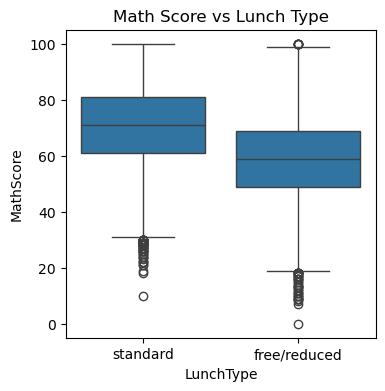

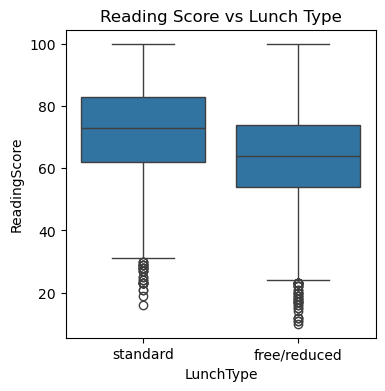

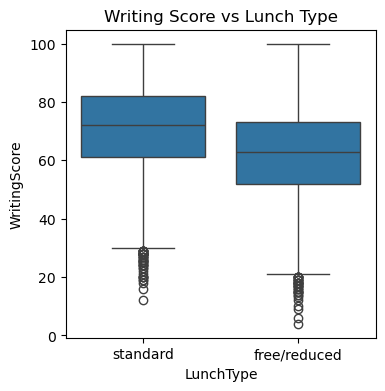

In [27]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df, x="LunchType", y="MathScore")
plt.title("Math Score vs Lunch Type")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=df, x="LunchType", y="ReadingScore")
plt.title("Reading Score vs Lunch Type")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=df, x="LunchType", y="WritingScore")
plt.title("Writing Score vs Lunch Type")
plt.show()

### 🔍 Interpretation: Lunch Type Influence
Students with **standard lunch** consistently score higher across all three subjects compared to those receiving **free/reduced lunch**.

Lunch type is often associated with socioeconomic status, suggesting that economic background impacts educational performance.

<h2 style="text-align:center;">Test Preparation Course Impact on Scores</h2>

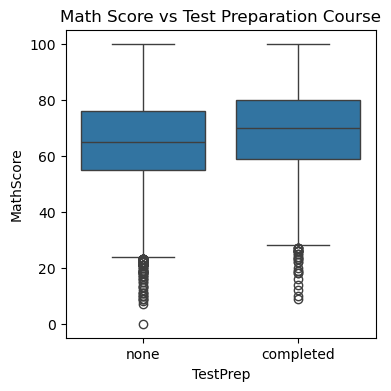

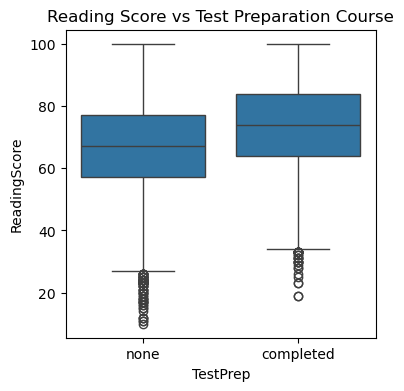

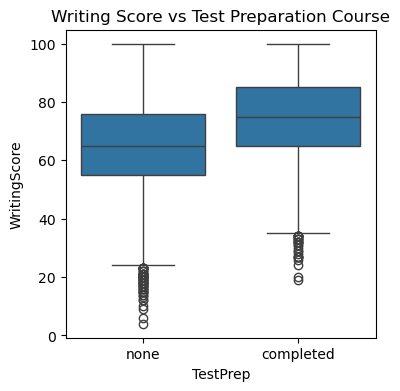

In [28]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df, x="TestPrep", y="MathScore")
plt.title("Math Score vs Test Preparation Course")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=df, x="TestPrep", y="ReadingScore")
plt.title("Reading Score vs Test Preparation Course")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(data=df, x="TestPrep", y="WritingScore")
plt.title("Writing Score vs Test Preparation Course")
plt.show()

### 🔍 Interpretation: Effect of Test Preparation
Students who **completed the test preparation course** score significantly higher in all subjects.

This shows test-preparation interventions have a strong academic impact.

<h2 style="text-align:center;">Creating Total Performance Score</h2>

In [24]:
df["TotalScore"] = df["MathScore"] + df["ReadingScore"] + df["WritingScore"]
df["AverageScore"] = df["TotalScore"] / 3
df[["TotalScore","AverageScore"]].head()

,TotalScore,AverageScore
0,216,72.000000
1,247,82.333333
2,271,90.333333
3,143,47.666667
4,229,76.333333


## Feature Engineering Explanation
Two new columns were created:

1. **TotalScore** – Sum of Math, Reading, and Writing scores  
2. **AverageScore** – Average performance across subjects  

These metrics make it easier to evaluate overall academic performance.

<h2 style="text-align:center;">Total Score Distribution</h2>

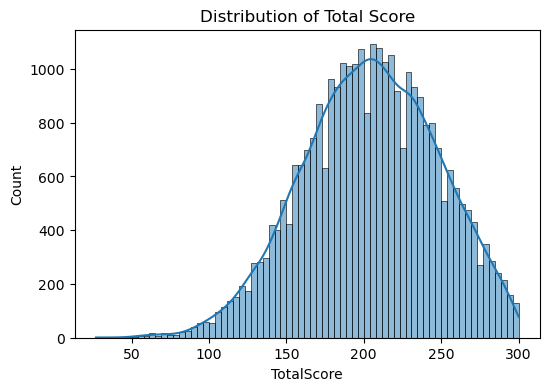

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(df["TotalScore"], kde=True)
plt.title("Distribution of Total Score")
plt.show()

## 📊 Total Score Distribution Explanation

The histogram shows how students are spread based on their overall performance.  
Most students score between **200–250**, indicating average-to-good overall performance.  
The curve suggests a **near-normal distribution**, with fewer very low or very high scores.

<h2 style="text-align:center;">Ethnic Group Distribution</h2>

This analysis shows the proportion of students belonging to each ethnic group.  
It helps understand demographic representation.

In [16]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


[np.int64(2219), np.int64(5826), np.int64(9212), np.int64(7503), np.int64(4041)]


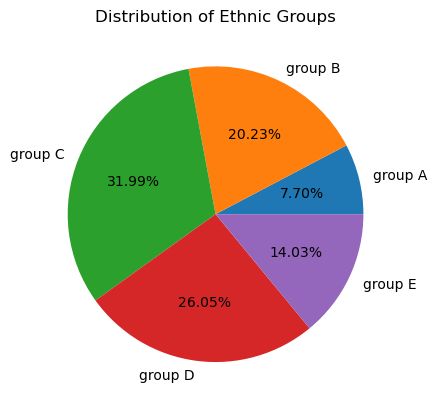

In [17]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()


l = ["group A", "group B", "group C", "group D",'group E'] 
mlist = [groupA["EthnicGroup"], groupB ["EthnicGroup"], groupC ["EthnicGroup"], groupD ["EthnicGroup"], groupE ["EthnicGroup"]]

print(mlist)
plt.pie(mlist, labels = l, autopct = "%1.2f%%")

plt.title("Distribution of Ethnic Groups")

plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

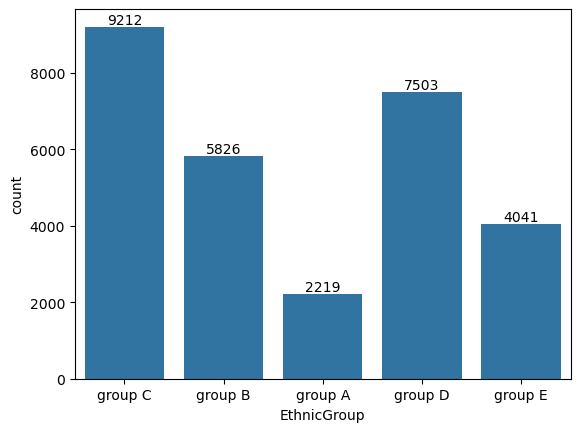

In [18]:
ax = sns.countplot(data = df, x = 'EthnicGroup') 
ax.bar_label(ax.containers[0])

### 🔍 Interpretation: Ethnic Group Composition
The dataset is not evenly distributed:
- Group C has the highest number of students.
- Group A has the fewest.

Uneven representation must be considered when interpreting performance differences across groups.

---

<h2 style="text-align:center;">Top 5 Insights from the Dataset</h2>

1. **Reading and Writing scores have the strongest correlation**, showing that language skills are closely related.
2. **Lunch Type affects performance**, with students having standard lunch scoring higher on average.
3. **Test preparation significantly improves scores** across all subjects.
4. **Clear gender differences exist** — females perform better in Reading & Writing, while males score slightly higher in Math.
5. **Ethnic group distribution is uneven**, which may affect aggregate score comparisons.

---

<h2 style="text-align:center;">Final Summary & Conclusion</h2>

This analysis explored how demographic, parental, and behavioral factors influence student
performance in Mathematics, Reading, and Writing. The dataset of more than 30,000 students
provided strong evidence of several important academic patterns.

Overall results show that **parental education, lunch type, and test preparation** have the most
significant impact on student achievement. Students with higher-educated parents, standard lunch
access, and completed test-prep courses consistently scored higher across all subjects. Gender-based
differences were also visible, with females performing better in Reading and Writing, while males
scored slightly higher in Mathematics.

The correlation analysis revealed a strong relationship between Reading and Writing scores, indicating
that language skills tend to improve together. Total and average score distributions suggest that most
students fall within a moderate performance range.

In conclusion, the study highlights how family background, academic support systems, and study
environment contribute to student performance. These insights can help educators design better
intervention strategies and guide future predictive modeling to improve academic outcomes.

---


<h2 style="text-align:center;">Future Scope</h2>

This project can be extended by:
- Applying machine learning models to predict student performance  
- Building decision trees to identify the most important predictors  
- Adding socio-economic attributes for deeper insights  
- Creating dashboards using Power BI / Tableau  
- Performing time-series or longitudinal analysis if yearly data is available